# Task 3 : Exploratory Data Analysis - Retail

# Author : Sahil

## Internship by GRIP @ The Sparks Foundation

Task :
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?
* Dash Boards- explaining the charts and interpretations

DataSet : https://bit.ly/3i4rbWl

## Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
!pip install numpy

In [5]:
!pip install plotly

In [6]:
import seaborn as sns
import plotly.express as px

In [8]:
import warnings 
warnings.filterwarnings("ignore")

## Reading Data

In [9]:
data = pd.read_csv("C:\\Users\\sahil\\Downloads\\SampleSuperstore.csv")

In [10]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data.shape

(9994, 13)

In [12]:
data.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

### Deleting unwanted data

In [13]:
data['Country'].value_counts()


United States    9994
Name: Country, dtype: int64

In [14]:
#drop country and postal code since all the data are from United States
data.drop(['Country','Postal Code'],inplace=True, axis=1)

In [15]:
data.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Correlation

<AxesSubplot:>

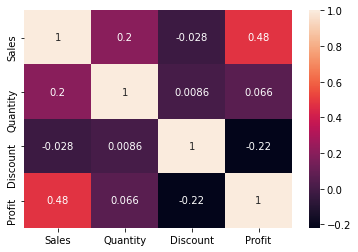

In [16]:
figure_1=data.corr()
sns.heatmap(figure_1,annot=True)

Therefore we are not getting any strong correlation between the variables

## Analysis of Data

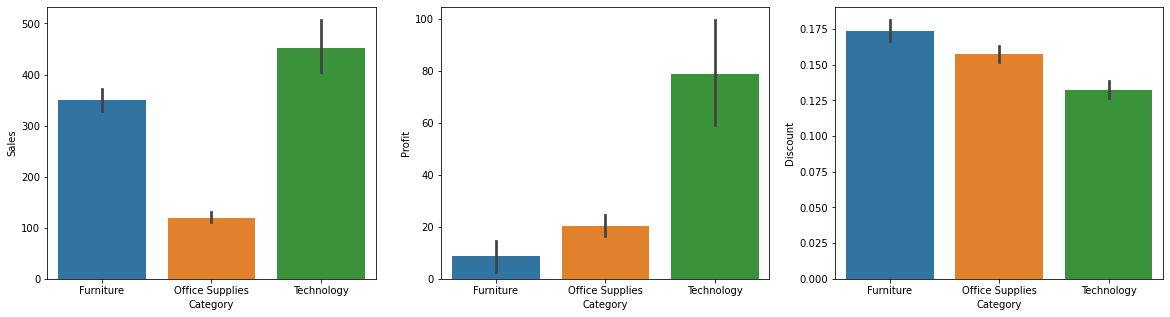

In [21]:
# On the basis of category 
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.barplot(x='Category', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Category', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Category', y='Discount', data = data,ax=ax[2])
plt.show()

 * Technology is having largest profit among all
 * Where we are not getting much profit on Furniture sales
 

<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

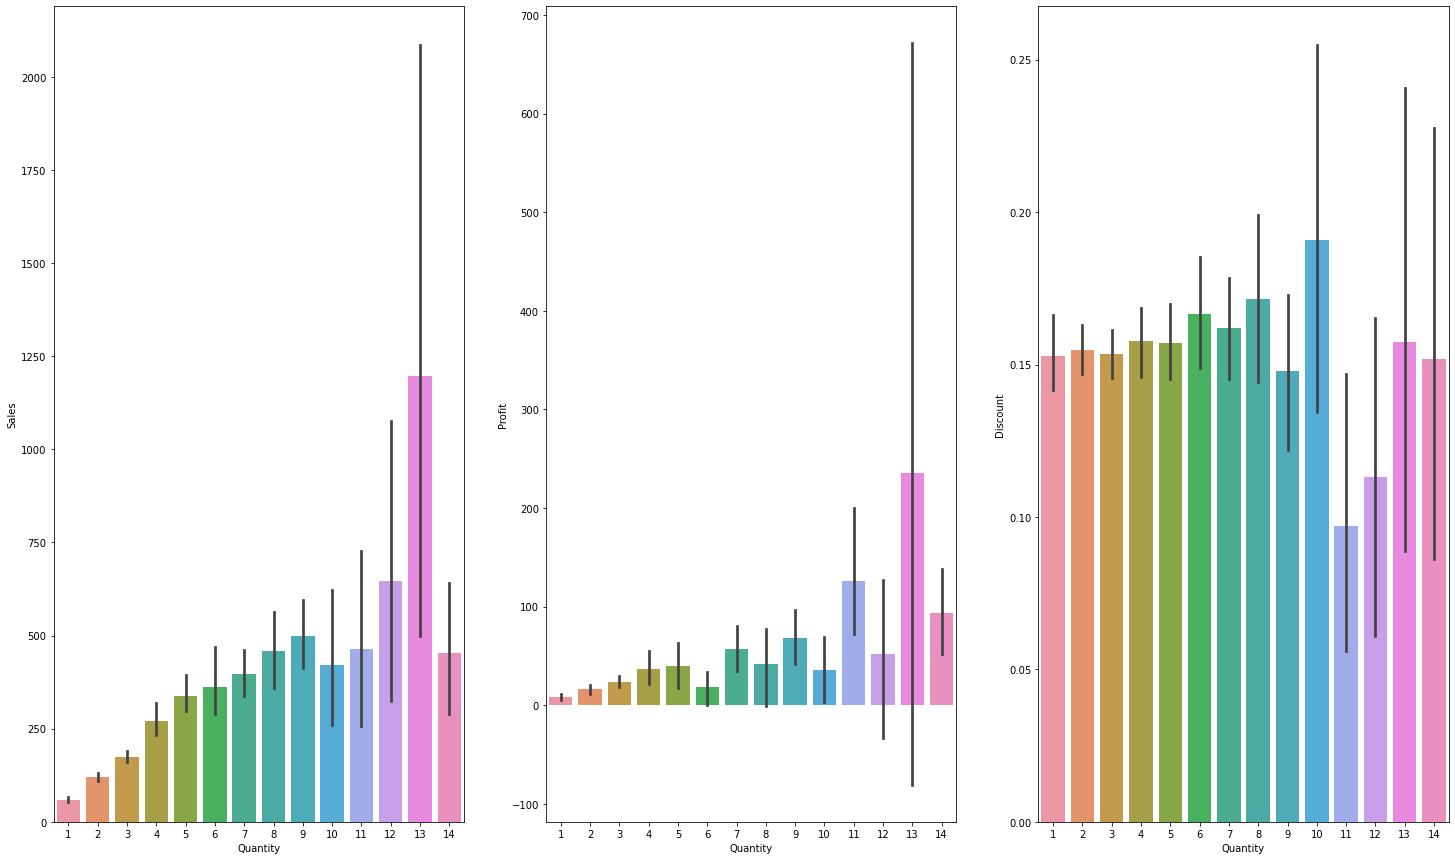

In [25]:
# Analysis on bases of quantity
fig,ax=plt.subplots(1,3,figsize=(25,15))
sns.barplot(x='Quantity', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Quantity', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data = data,ax=ax[2])

* We are getting maximum profit on 13 number quantity

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

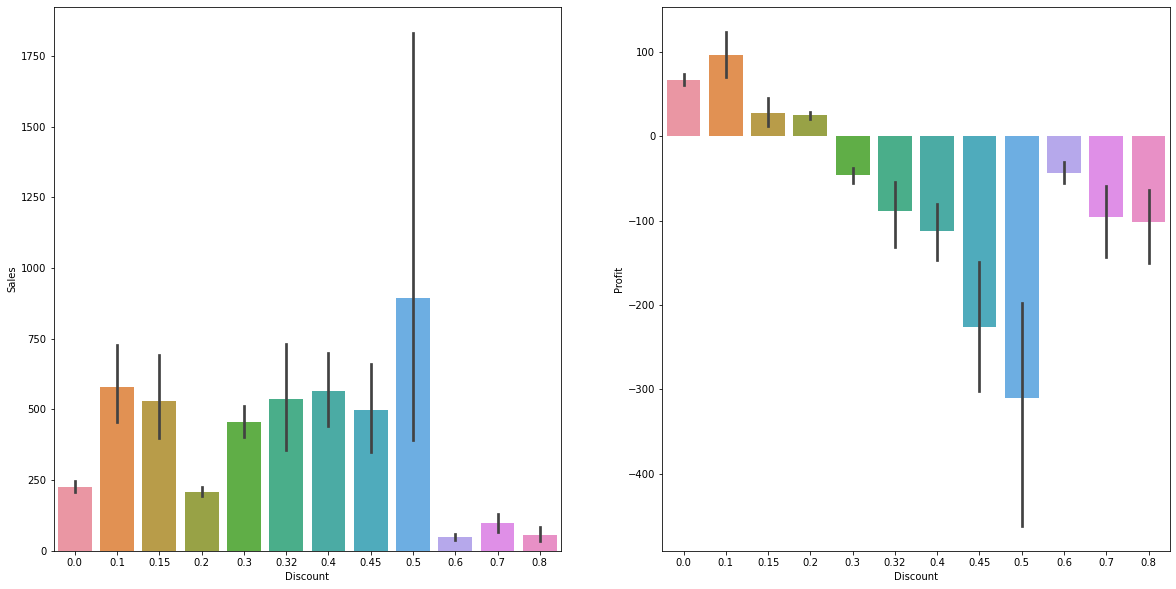

In [28]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='Discount', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = data)

* At discount of 50% we have maximum sales but maximum loss too

* We are in Profit to till 20% discoutn after 20% discount we are at loss

## Based on Category - Analysis

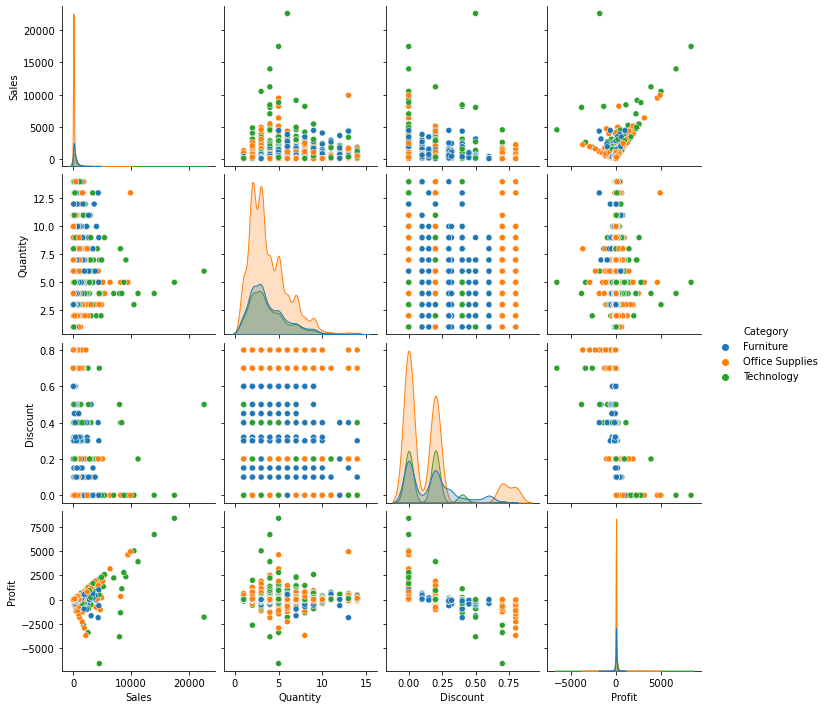

In [30]:
sns.pairplot(data,hue='Category')


## Based on Region - Analysis

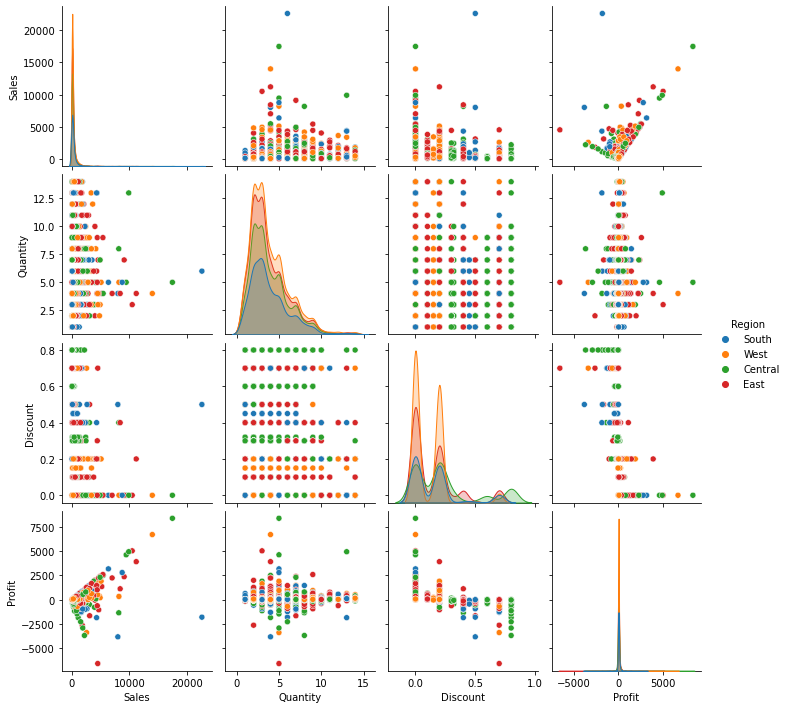

In [31]:
sns.pairplot(data,hue='Region')


## Based on Segment - Analysis

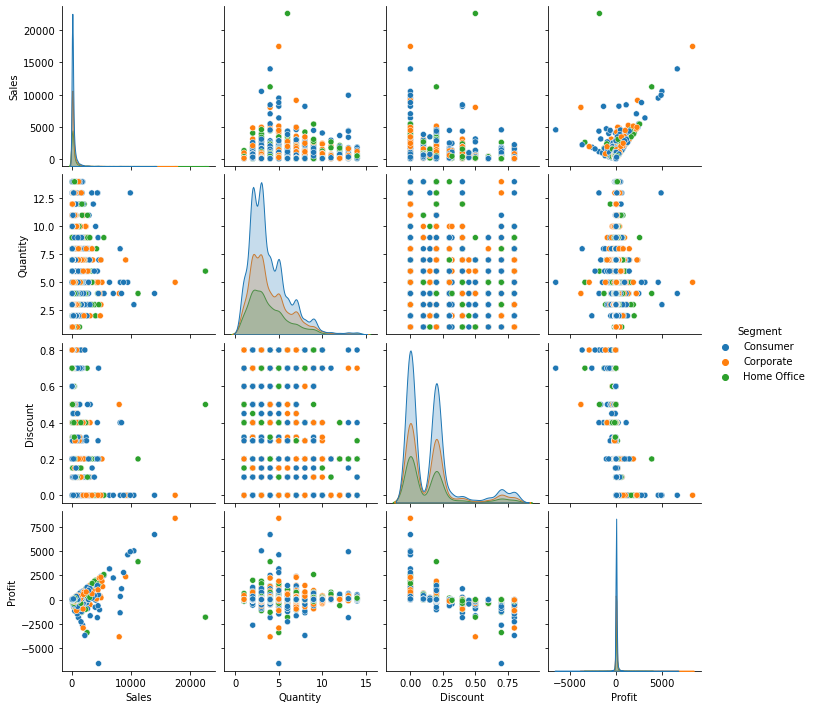

In [32]:
sns.pairplot(data,hue='Segment')


Text(0.5, 1.0, 'Sub-Category')

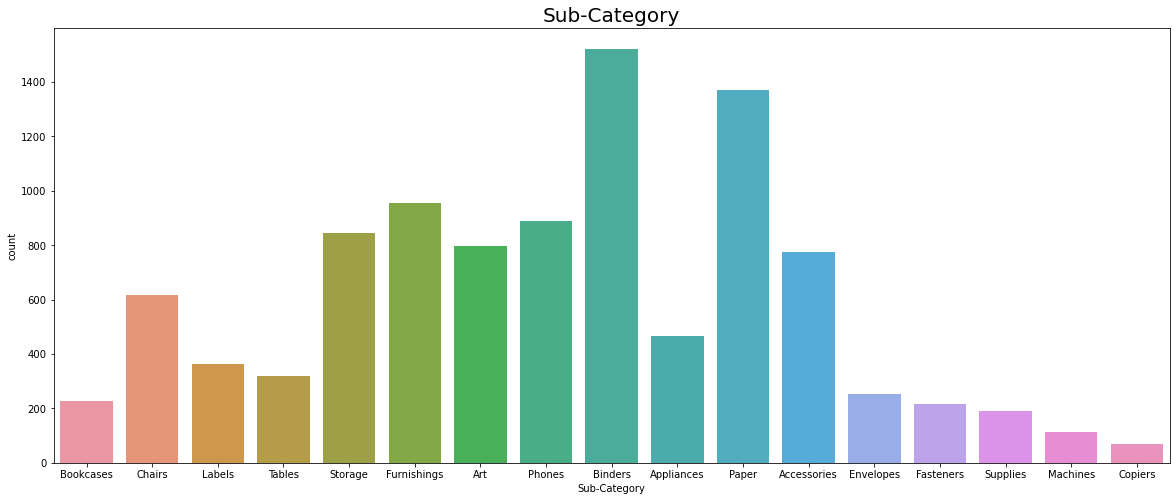

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(data['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'State')

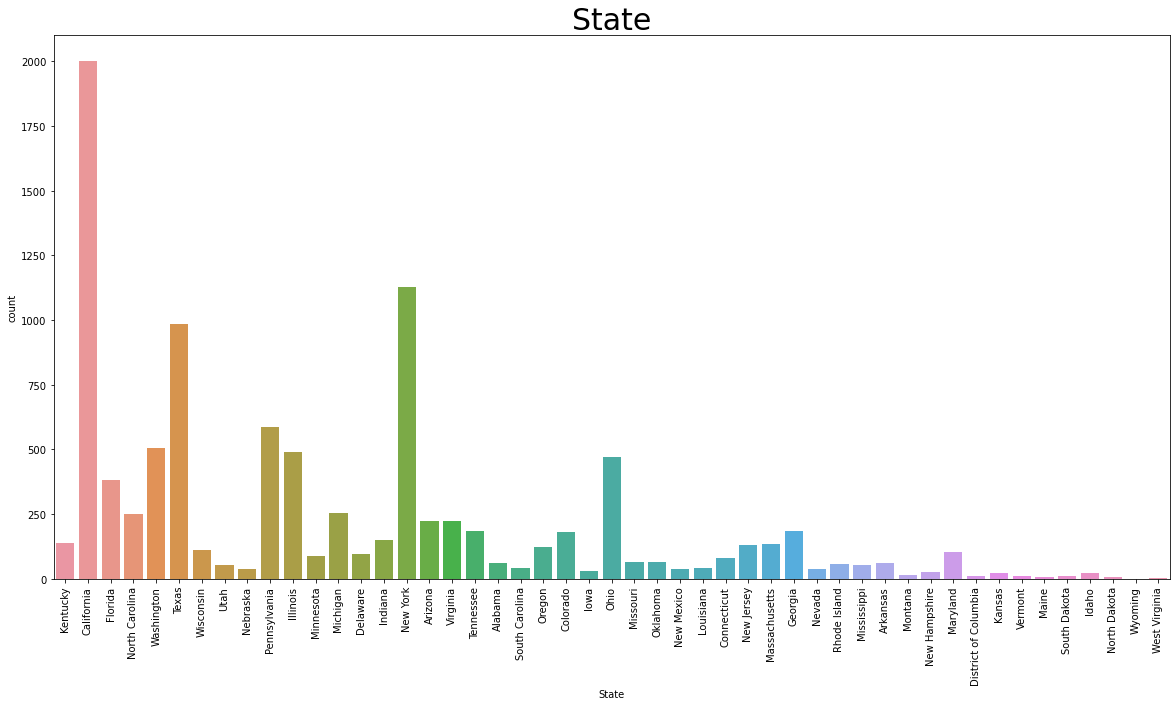

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(data['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=30)


Text(0.5, 1.0, 'Quantity')

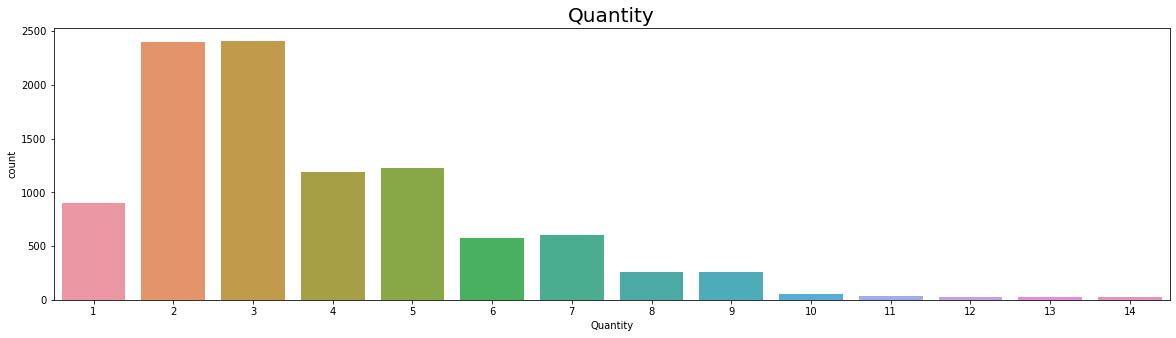

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(data['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

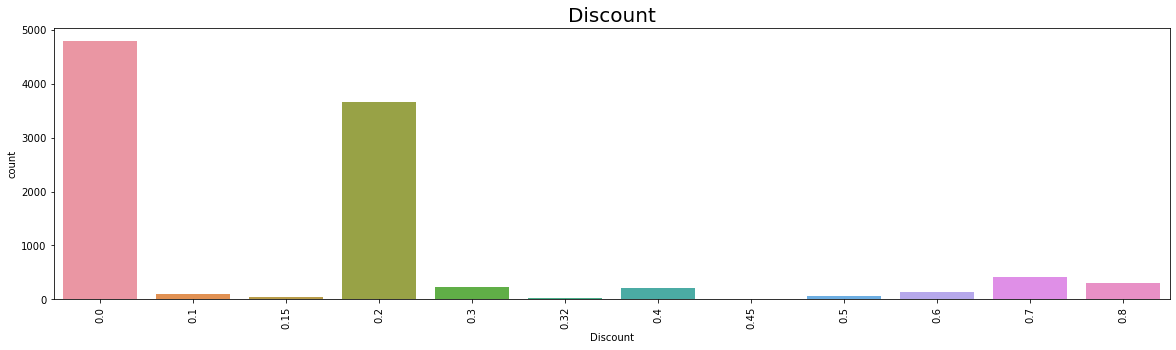

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(data['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

## Data Distribution

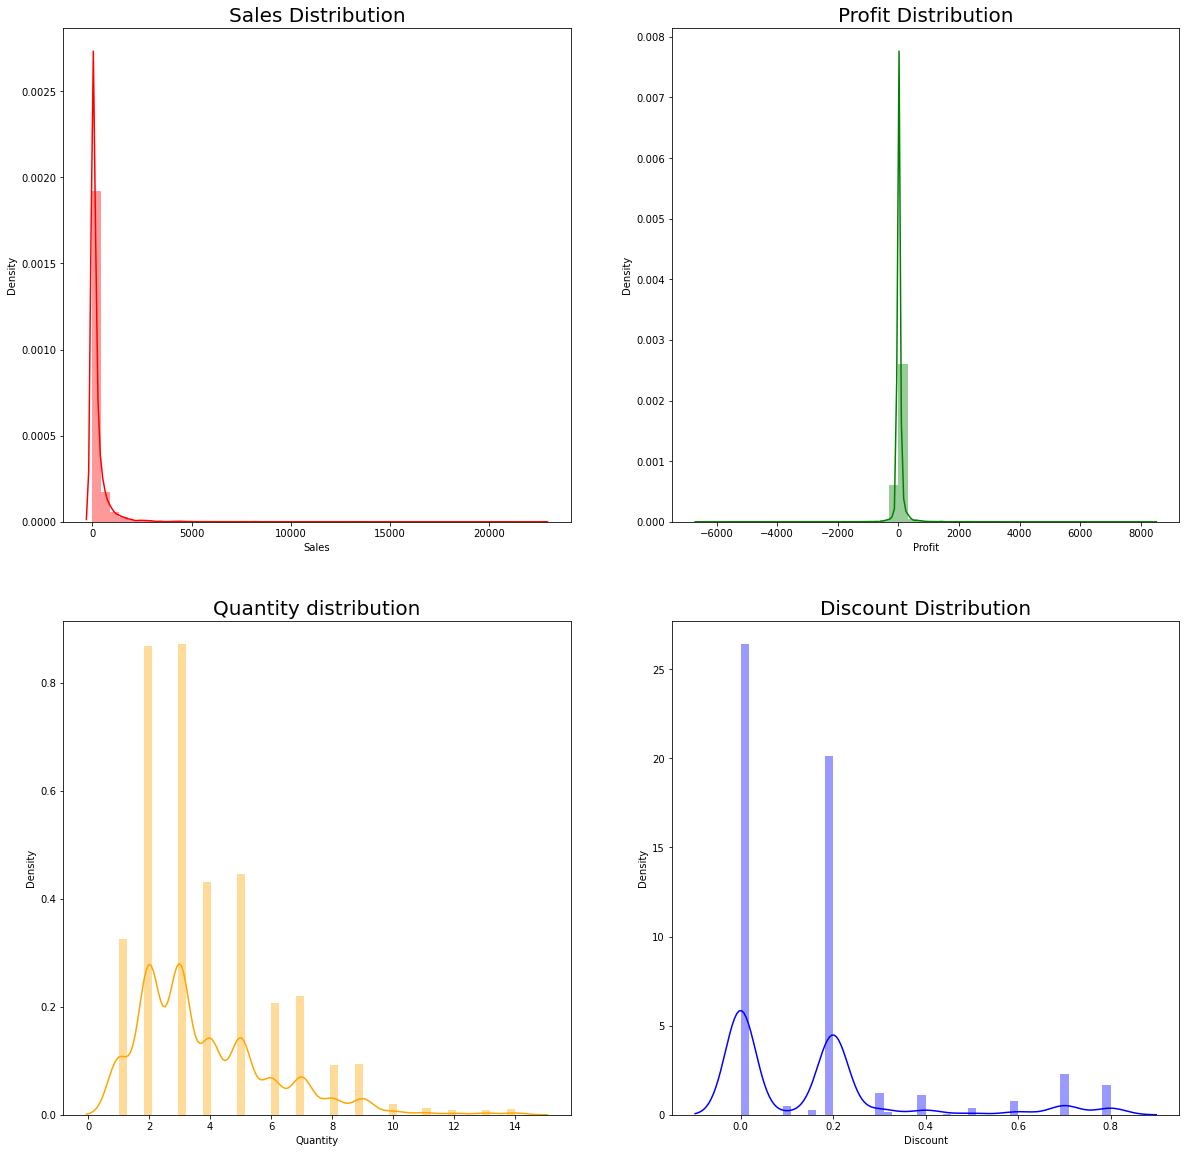

In [44]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (20,20))
sns.distplot(data['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(data['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(data['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(data['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

## Segment wise Analysis

In [45]:
data['Segment'].value_counts()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [47]:
df_segment= data.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

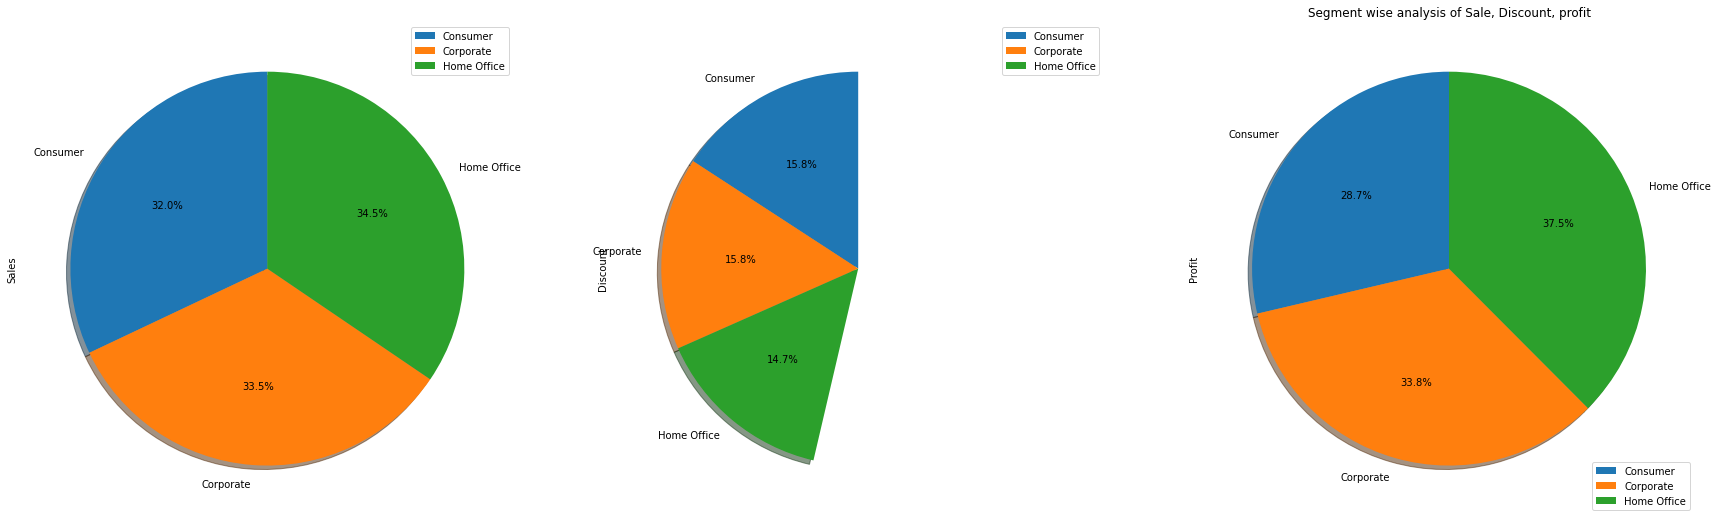

In [49]:
#1. sales 
#2. Discount 
#3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%2.1f%%',
                    figsize=(30, 25),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

*Discount :
Consumer : 15.8%
Corporate : 15.8%
Home Office : 14.7%

*Profit :
Consumer : 15.8%
Corporate : 15.8%
Home Office : 14.7%

*Sales:
Consumer : 32%
Corporate - 33.5%
Home Office : 34.5%


## City wise Profit Analysis

In [52]:
df_city= data.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

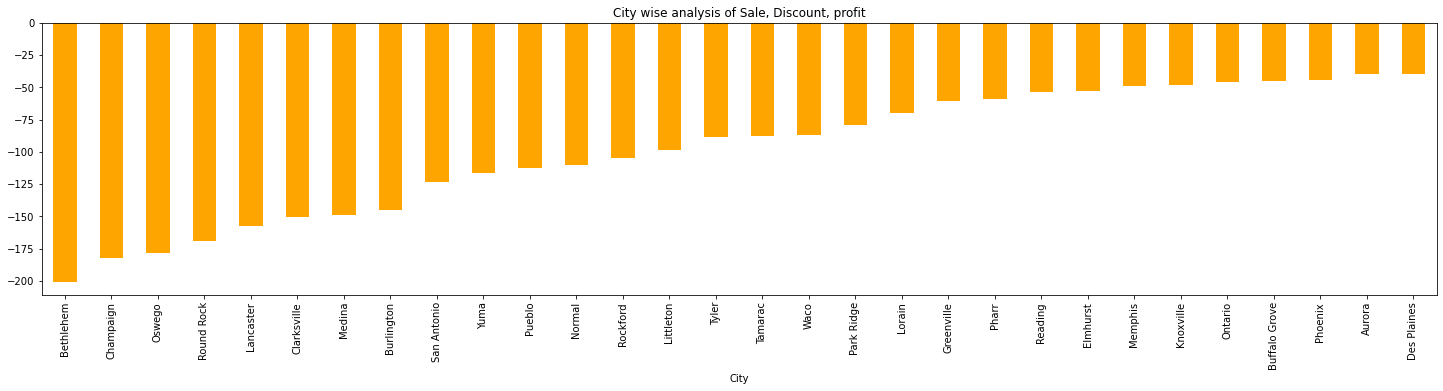

In [57]:
#1.Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(25,5),color = 'Orange')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

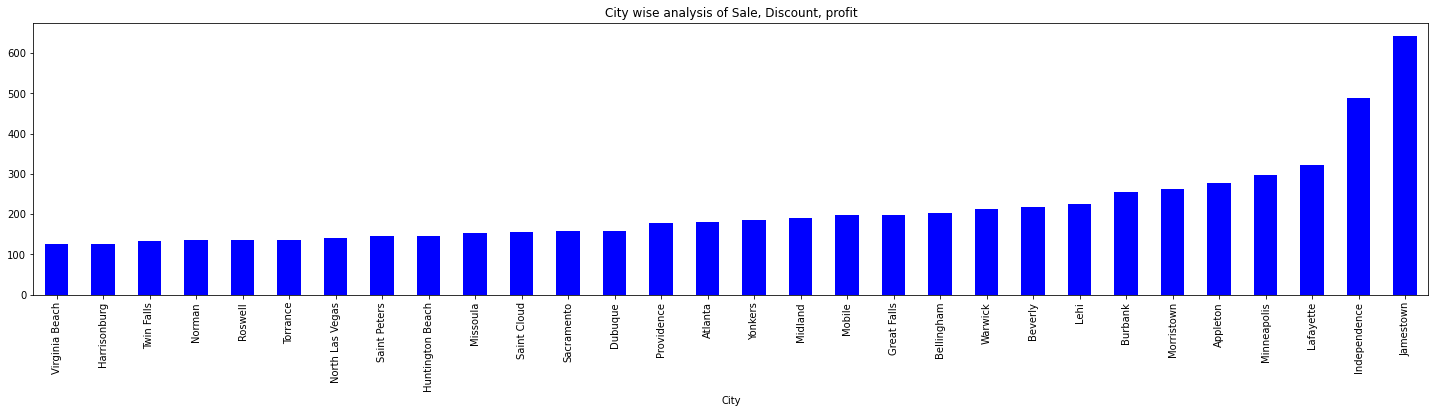

In [60]:
#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(25,5),color = 'Blue')
plt.title('City wise analysis of Sale, Discount, profit')

## SubCategory Wise Profit Analysis

In [63]:
df_sub_category = data.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


### 1.Based on Sales

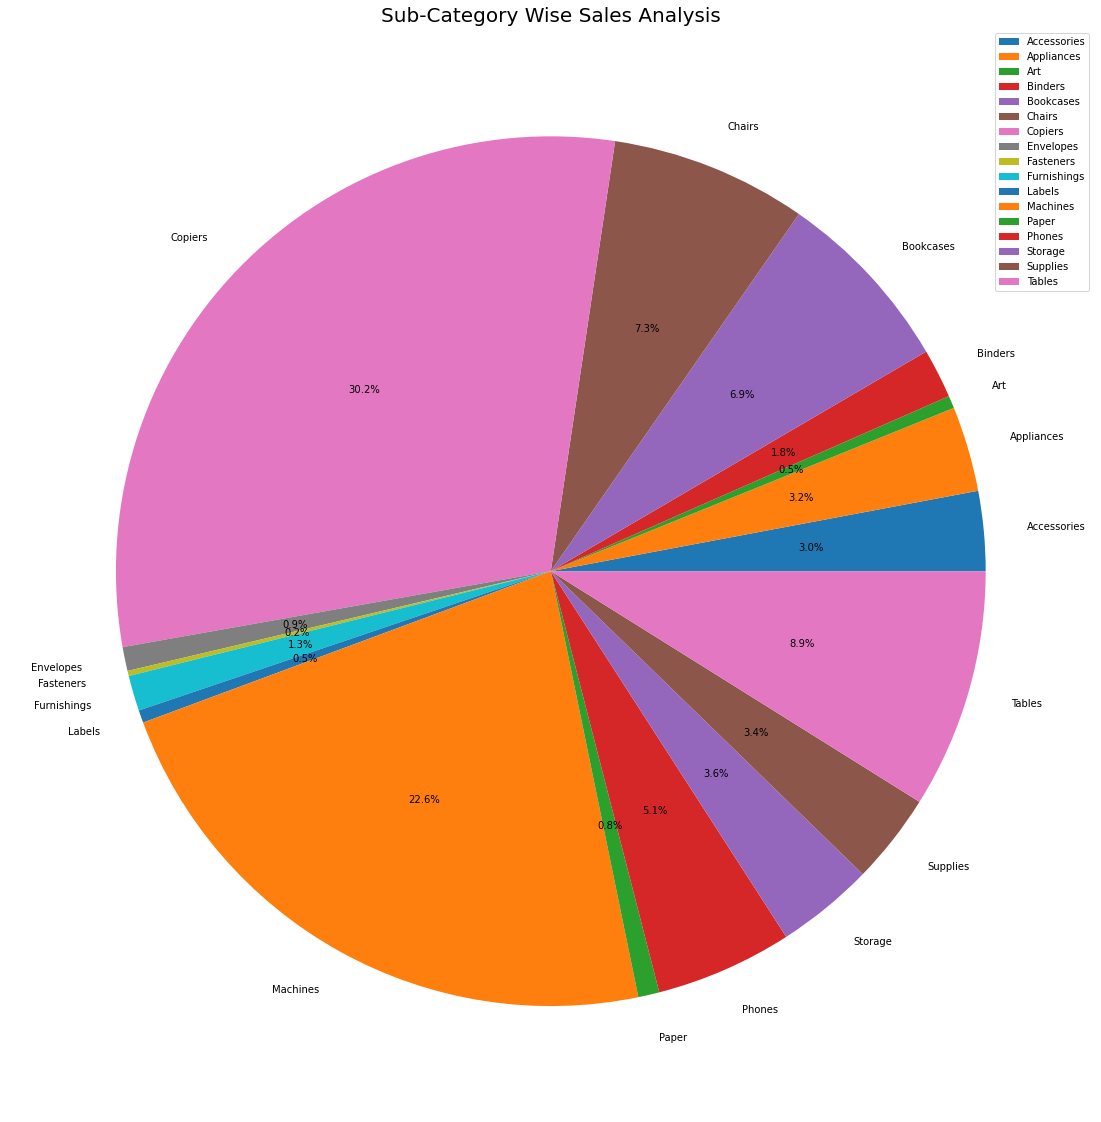

In [65]:
plt.figure(figsize = (20,20))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()


* Copiers and machines have highest sales

### 2.Based on Discount

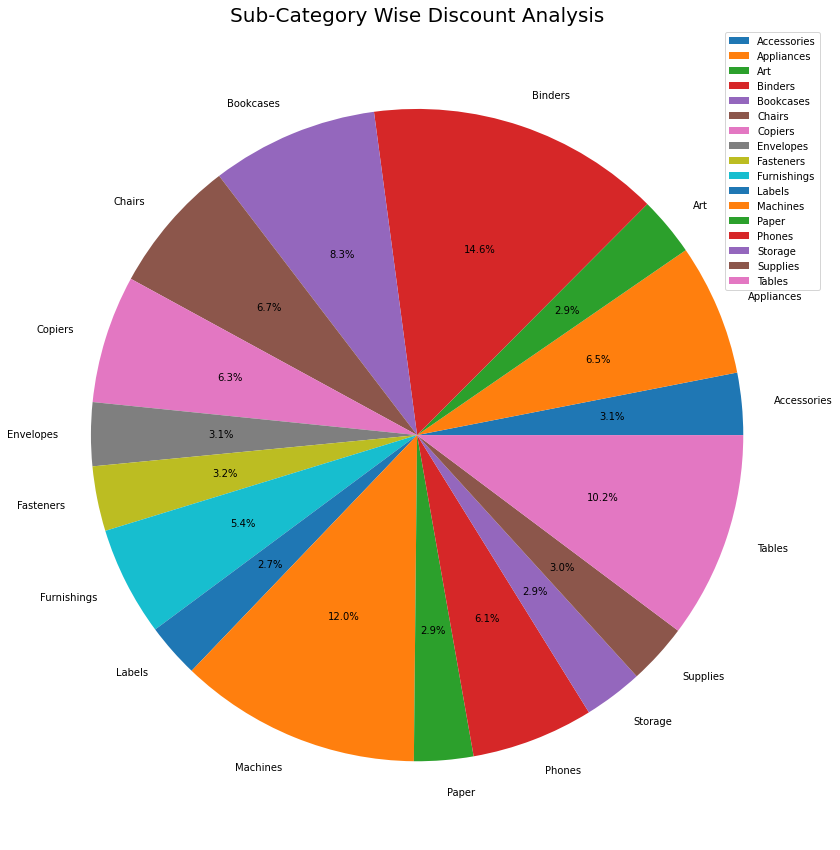

In [66]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

* Machines and Binders have highest discount

## Ship Mode Wise Analysis


In [67]:
data['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [69]:
df_shipmode = data.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

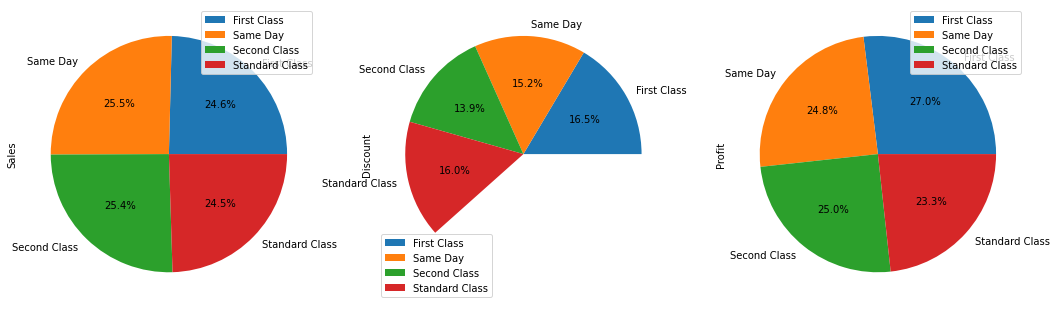

In [70]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

* Therefore Profit is high for first Class

## Observations and Conclusion

### Weak areas where Manager can work to make more profit


* Profits and Sales are not Linear in most of the states
* Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.
* Central region needs to be given more attention.

* Machines and supplies are having less profit and are a loss making sub-category.

* Furnitures are not providing much profit margin.
* Higher discounts are not of much use, the profit are in negative and even the sales are having downtrend after 60% discount.
* The Office Supplies has maximum loss at 80% and 0% discount.
* Furniture and Technology had maximum loss at lower Discount rates
